In [1]:
#Task 1.1
#define a function to read the data from the CSV files
def readcsv(filename):
    content = []
    with open(filename, encoding='utf-8-sig') as f:
        lines = [line.rstrip() for line in f] 
        for line in lines:
            words = line.split(',')
            content.append((words[0], words[1:]))
    return content



#read all the csv files and get to know them by printing the first two rows

barometer = readcsv('barometer-last-year.csv')
print('barometer: \n', barometer[0:2])

indoor = readcsv('indoor-temperature-last-year.csv')
print('indoor: \n', indoor[0:2])


outside = readcsv('outside-temperature-last-year.csv')
print('outside: \n', outside[0:2])


rainfall = readcsv('rainfall-last-year.csv')
print('rainfall: \n', rainfall[0:2])


print(len(barometer), len(indoor), len(outside), len(rainfall))

barometer: 
 [('"DateTime"', ['"Baro"']), ('"2016-10-09 00:00:00"', ['1021.9'])]
indoor: 
 [('"DateTime"', ['"Humidity"', '"Temperature"', '"Temperature_range (low)"', '"Temperature_range (high)"']), ('"2016-10-09 00:00:00"', ['54', '21.93', '21', '22.8'])]
outside: 
 [('"DateTime"', ['"Temperature"', '"Temperature_range (low)"', '"Temperature_range (high)"']), ('"2016-10-09 00:00:00"', ['10.66', '7.2', '13.8'])]
rainfall: 
 [('"DateTime"', ['"mm"']), ('"2016-10-09 00:00:00"', ['0'])]
356 355 356 354


In [2]:
#task 1.2
#delete the header
del(barometer[0])
del(indoor[0])
del(outside[0])
del(rainfall[0])

In [3]:
#task 1.3
#get weather data
nb = len(barometer)
baro = []
date_all = []
for i in range(nb):
    baro.append(float(barometer[i][1][0]))
    date_all.append(barometer[i][0])

#print(baro[0])  #check

n_r = len(rainfall)
rain = []
date_r = []
for i in range(n_r):
    rain.append(float(rainfall[i][1][0]))
    date_r.append(rainfall[i][0])

#print(rain[0])


n_i = len(indoor)
humidity = []
temp_in = []
lowrange_in = []
highrange_in =[]
date_in = []
for i in range(n_i):
    humidity.append(float(indoor[i][1][0]))
    temp_in.append(float(indoor[i][1][1]))
    lowrange_in.append(float(indoor[i][1][2]))
    highrange_in.append(float(indoor[i][1][3]))
    date_in.append(indoor[i][0])

#print(temp_in[0])

n_o = len(outside)
temp_out = []
lowrange_out =[]
highrange_out = []
for i in range(n_o):
    temp_out.append(float(outside[i][1][0]))
    lowrange_out.append(float(outside[i][1][1]))
    highrange_out.append(float(outside[i][1][2]))

#print(nb, n_r, n_i, n_o, len(date_all))

In [4]:
#task 1.4
#since the length of data is not the same
#we need to find missing dates in Rainfall and Indoor
missingdate_r = []
for i in range (0, len(date_all)):
    if (date_all[i] not in date_r):
        missingdate_r.append(date_all[i])
    else:
        pass
print(missingdate_r)

missingdate_in = []
for i in range (0, len(date_all)):
    if (date_all[i] not in date_in):
        missingdate_in.append(date_all[i])
    else:
        pass
print(missingdate_in)

['"2016-12-22 00:00:00"', '"2017-05-17 00:00:00"']
['"2017-07-22 00:00:00"']


In [5]:
#task 1.5
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import datetime

#construct a dataframe
d = {'rainfall': pd.Series(rain, index=date_r)}
df = pd.DataFrame(d)
df = df.reindex(date_all, fill_value = np.nan)

d_in = {'humidity': pd.Series(humidity, index = date_in), 
        'indoor temp': pd.Series(temp_in, index = date_in)}
df_in = pd.DataFrame(d_in)
df_in = df_in.reindex(date_all, fill_value = np.nan)


d_out = {'outside temp': pd.Series(temp_out, index=date_all),
         'barometer': pd.Series(baro, index=date_all)}
df_out = pd.DataFrame(d_out)


merged_df = pd.concat([df_in, df_out,df],  axis=1)
print(merged_df[0:4]) 



                       humidity  indoor temp  outside temp  barometer  \
"2016-10-09 00:00:00"      54.0        21.93         10.66     1021.9   
"2016-10-10 00:00:00"      52.0        21.77          8.94     1019.9   
"2016-10-11 00:00:00"      51.0        21.36          8.69     1015.8   
"2016-10-12 00:00:00"      51.0        21.44         11.55     1013.2   

                       rainfall  
"2016-10-09 00:00:00"       0.0  
"2016-10-10 00:00:00"       0.0  
"2016-10-11 00:00:00"       0.0  
"2016-10-12 00:00:00"       0.0  


In [6]:
#task 1.6 (get all summary statistics)
#change date into standard format
date_all = [i.replace('"', '') for i in date_all]
date = [d.date() for d in pd.to_datetime(date_all)]

merged_df.index = pd.to_datetime(date)
merged_df.index.name = 'Date'



##calculate statistics required for each component
print('summary statistics: ')
print(merged_df.describe())

print('')
print('')
min_lowin = np.amin(lowrange_in)
max_lowin = np.amax(lowrange_in)
mean_lowin = np.mean(lowrange_in)
sd_lowin = np.std(lowrange_in)
print('indoor temperature range(low):')
print('The minimum of the indoor temperature range(low) is', min_lowin)
print('The maximum of the indoor temperature range(low) is', max_lowin)
print('The mean of the indoor temperature range(low) is', mean_lowin)
print('The standard deviation of the indoor temperature range(low) is', sd_lowin)
print('--------------------------------')

min_highin = np.amin(highrange_in)
max_highin = np.amax(highrange_in)
mean_highin = np.mean(highrange_in)
sd_highin = np.std(highrange_in)
print('indoor temperature range(high):')
print('The minimum of the indoor temperature range(high) is', min_highin)
print('The maximum of the indoor temperature range(high) is', max_highin)
print('The mean of the indoor temperature range(high) is', mean_highin)
print('The standard deviation of the indoor temperature range(high) is', sd_highin)
print('')
print('')


min_lowout = np.amin(lowrange_out)
max_lowout = np.amax(lowrange_out)
mean_lowout = np.mean(lowrange_out)
sd_lowout = np.std(lowrange_out)
print('outside temperature range(low):')
print('The minimum of the outside temperature range(low) is', min_lowout)
print('The maximum of the outside temperature range(low) is', max_lowout)
print('The mean of the outside temperature range(low) is', mean_lowout)
print('The standard deviation of the outside temperature range(low) is', sd_lowout)
print('-------------------------------')

min_highout = np.amin(highrange_out)
max_highout = np.amax(highrange_out)
mean_highout = np.mean(highrange_out)
sd_highout = np.std(highrange_out)
print('outside temperature range(high):')
print('The minimum of the outside temperature range(high) is', min_highout)
print('The maximum of the outside temperature range(high) is', max_highout)
print('The mean of the outside temperature range(high) is', mean_highout)
print('The standard deviation of the outside temperature range(high) is', sd_highout)

summary statistics: 
         humidity  indoor temp  outside temp    barometer    rainfall
count  354.000000   354.000000    355.000000   355.000000  353.000000
mean    48.519774    21.827885     11.138877  1009.998873    1.548725
std      5.188886     2.058307      5.355042     9.869662    3.324599
min     37.000000    18.040000     -1.810000   979.600000    0.000000
25%     44.000000    20.345000      7.390000  1004.850000    0.000000
50%     48.000000    21.710000     10.960000  1010.500000    0.000000
75%     52.000000    22.710000     15.050000  1016.050000    1.100000
max     59.000000    29.210000     26.380000  1035.600000   23.200000


indoor temperature range(low):
The minimum of the indoor temperature range(low) is 14.9
The maximum of the indoor temperature range(low) is 28.2
The mean of the indoor temperature range(low) is 20.55593220338983
The standard deviation of the indoor temperature range(low) is 2.401725217005994
--------------------------------
indoor temperature ra

The heatmap of correlation matrix:


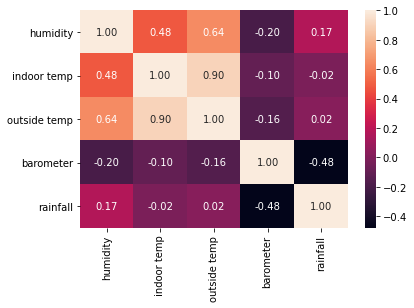

In [7]:
#task 1.7 show correlation using heatmap
print('The heatmap of correlation matrix:')
sns.heatmap(merged_df.corr(), annot=True, fmt=".2f")
plt.show()

The correlogram of the five parameters:


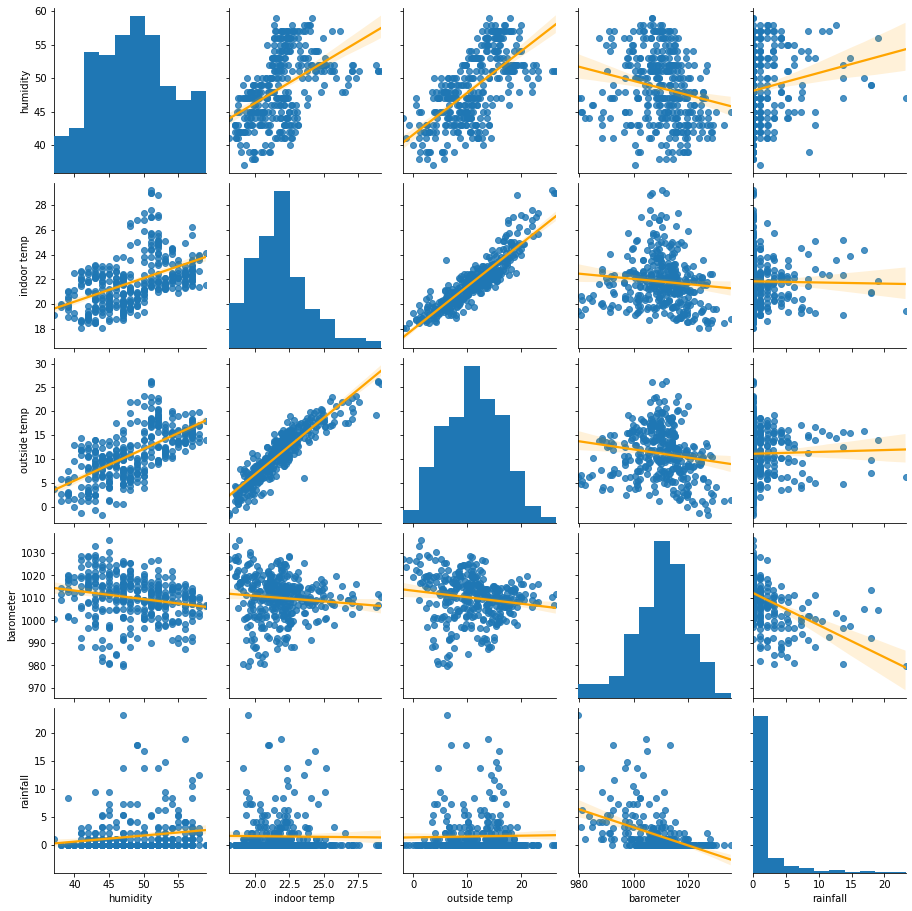

In [8]:
#task 1.8 show correlation using pairplots
print('The correlogram of the five parameters:')
sns.pairplot(merged_df, kind = 'reg', plot_kws={'line_kws':{'color':'orange'}})

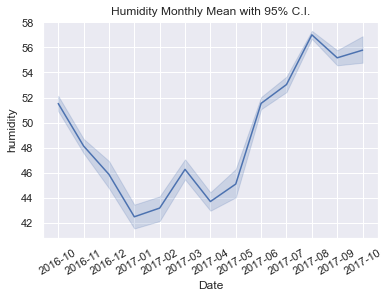

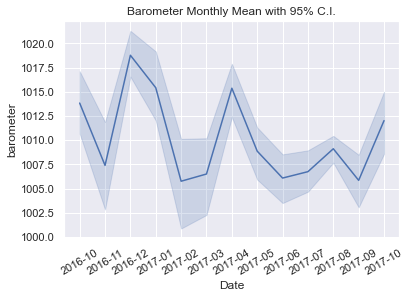

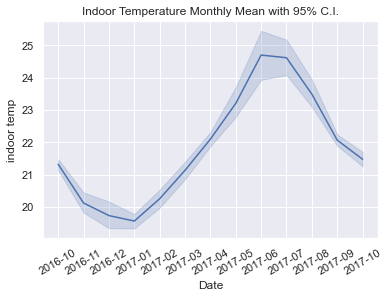

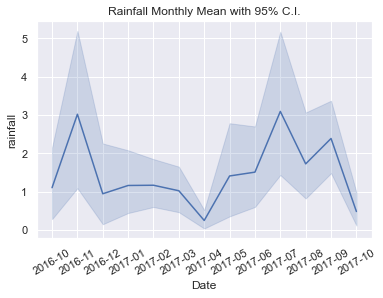

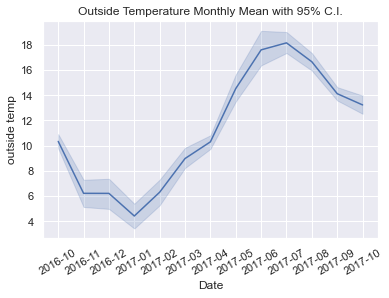

In [9]:
#task 2.1 monthly summary graphs
plt.figure()

#plt.subplots_adjust(hspace = 0.4)
sns.set(style="darkgrid")

#plt.subplot(3, 2, 1)
#sns.boxplot(x = merged_df.index.strftime('%Y-%m'), y =merged_df['barometer'], data = merged_df) 
sns.lineplot(x=merged_df.index.strftime('%Y-%m'), y=merged_df.humidity, data=merged_df, markers=True).set_title("Humidity Monthly Mean with 95% C.I.")
plt.xticks(rotation=30)
plt.savefig('month-hu.png', dpi=100)
plt.show()

#plt.subplot(3, 2, 2)
#sns.boxplot(x =merged_df.index.strftime('%Y-%m'), y =merged_df['humidity'], data = merged_df) 
sns.lineplot(x=merged_df.index.strftime('%Y-%m'), y=merged_df.barometer, data=merged_df, markers=True).set_title("Barometer Monthly Mean with 95% C.I.")
plt.xticks(rotation=30)
plt.savefig('month-baro.png', dpi=100)
plt.show()

#plt.subplot(3, 2, 3)
#sns.boxplot(x =merged_df.index.strftime('%Y-%m'), y =merged_df['indoor temp'], data = merged_df) 
sns.lineplot(x=merged_df.index.strftime('%Y-%m'), y=merged_df['indoor temp'], data=merged_df).set_title("Indoor Temperature Monthly Mean with 95% C.I.")
#sns.lineplot(x=merged_df.index.strftime('%Y-%m'), y=merged_df['outside temp'], data=merged_df, estimator='mean', ci=95)
plt.xticks(rotation=30)
plt.savefig('month-in.png', dpi=100)
plt.show()

#plt.subplot(3, 2, 4)
#sns.boxplot(x =merged_df.index.strftime('%Y-%m'), y =merged_df['outside temp'], data = merged_df) 
sns.lineplot(x=merged_df.index.strftime('%Y-%m'), y=merged_df.rainfall, data=merged_df).set_title("Rainfall Monthly Mean with 95% C.I.")
plt.xticks(rotation=30)
plt.savefig('month-r.png', dpi=100)
plt.show()

#plt.subplot(3, 2, 5)
sns.lineplot(x=merged_df.index.strftime('%Y-%m'), y=merged_df['outside temp'], data=merged_df).set_title("Outside Temperature Monthly Mean with 95% C.I.")
plt.xticks(rotation=30)
plt.savefig('month-out.png', dpi=100)
plt.show()


#plt.subplot(3, 2, 6)
#sns.boxplot(x=merged_df.index.strftime('%Y-%m'), y=merged_df['indoor temp'],data=merged_df)


            humidity  indoor temp  outside temp  barometer  rainfall  season
Date                                                                        
2016-10-09      54.0        21.93         10.66     1021.9       0.0  autumn
2016-10-10      52.0        21.77          8.94     1019.9       0.0  autumn
2016-10-11      51.0        21.36          8.69     1015.8       0.0  autumn
2016-10-12      51.0        21.44         11.55     1013.2       0.0  autumn
2016-10-13      52.0        21.22          9.40     1005.9       0.0  autumn


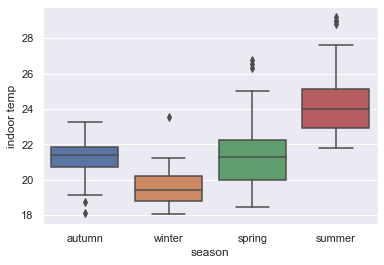

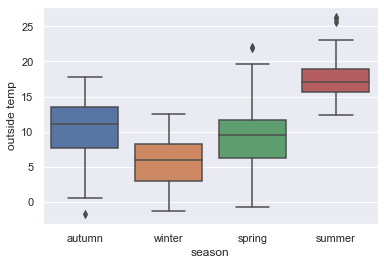

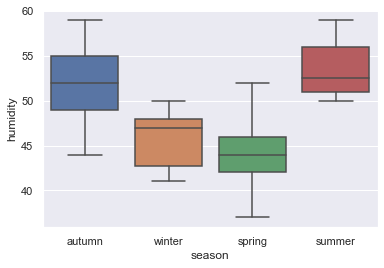

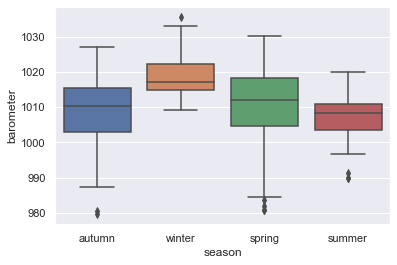

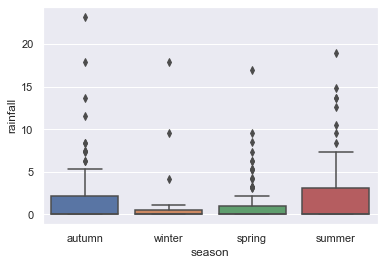

<Figure size 432x288 with 0 Axes>

In [10]:
#task 2.2 seasonal summary graphs
def season_of_date(date):
    year = str(date.year)
    seasons = {'spring': pd.date_range(start='01/03/'+year, end='31/05/'+year),
               'summer': pd.date_range(start='01/06/'+year, end='31/08/'+year),
               'autumn': pd.date_range(start='01/09/'+year, end='30/11/'+year)}
    if date in seasons['spring']:
        return 'spring'
    if date in seasons['summer']:
        return 'summer'
    if date in seasons['autumn']:
        return 'autumn'
    else:
        return 'winter'

# Assuming df has a date column of type `datetime`
merged_df['season'] = merged_df.index.map(season_of_date)

print(merged_df.head())

plt.figure()
sns.boxplot(x=merged_df.season, y=merged_df['indoor temp'], data=merged_df)
plt.show()
plt.savefig('season_in.png', dpi=100)

sns.boxplot(x=merged_df.season, y=merged_df['outside temp'], data=merged_df)
plt.show()
plt.savefig('season_out.png', dpi=100)

sns.boxplot(x=merged_df.season, y=merged_df['humidity'], data=merged_df)
plt.show()
plt.savefig('season_h.png', dpi=100)

sns.boxplot(x=merged_df.season, y=merged_df['barometer'], data=merged_df)
plt.show()
plt.savefig('season_baro.png', dpi=100)

sns.boxplot(x=merged_df.season, y=merged_df['rainfall'], data=merged_df)
plt.show()
plt.savefig('season_r.png', dpi=100)